In [47]:
import pandas as pd

In [48]:
#create function
def createDateTurbidity(fileName):
    # open file

    #read file
    df = pd.read_excel('../sensorData/'+fileName)
    # set different ranges for turbidity
    datesList=[]
    dateTurbidityDict={}
    #average out the turbidity per day
    print(df['Date and Time'])
    countDate=0

    for row in df.itertuples():
        if row[1][5:10] not in datesList:
            datesList.append(row[1][5:10])
            dateTurbidityDict[row[1][5:10]] = int(row[3])
            countDate=1
        else:
            countDate+=1
            dateTurbidityDict[row[1][5:10]] = (int(dateTurbidityDict[row[1][5:10]])*(countDate-1)+ int(row[3]))/countDate
    return [datesList,dateTurbidityDict]
#sort and plot graph per day

0       2020-01-15 16:00:35
1       2020-01-15 16:01:33
2       2020-01-15 16:02:33
3       2020-01-15 16:03:22
4       2020-01-15 16:04:26
               ...         
9618    2020-01-22 16:21:01
9619    2020-01-22 16:22:09
9620    2020-01-22 16:23:16
9621    2020-01-22 16:24:23
9622    2020-01-22 16:25:32
Name: Date and Time, Length: 9623, dtype: object
0       2020-01-15 16:00:35
1       2020-01-15 16:01:33
2       2020-01-15 16:02:33
3       2020-01-15 16:03:22
4       2020-01-15 16:04:26
               ...         
9618    2020-01-22 16:21:01
9619    2020-01-22 16:22:09
9620    2020-01-22 16:23:16
9621    2020-01-22 16:24:23
9622    2020-01-22 16:25:32
Name: Date and Time, Length: 9623, dtype: object


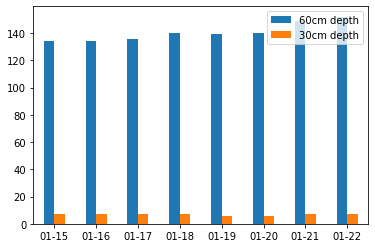

In [53]:
dateTurbidityDict60CM = createDateTurbidity('Sensor60 cm.xlsx')
dateTurbidityDict30CM = createDateTurbidity('Sensor30 cm.xlsx')
dfGraph = pd.DataFrame({'60cm depth': list(dateTurbidityDict60CM[1].values()),'30cm depth': list(dateTurbidityDict30CM[1].values())
                   }, index=dateTurbidityDict60CM[0])
ax = dfGraph.plot.bar(rot=0)